In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import os

import cobra

In [5]:
#Step 1: Load up the results of the uncertainty injection on all biomass constitutions simultaneously.
#The interesting/important part of this data is the effects on the biomass pseudoreaction
#Might also be worth noting the relative difference between the effects of uncertainity on the individual reactions compared to the biomass reactions.
#The expected result is that the biomass pseudoreaction will have a massively dampening effect compared to the individual reactions


atpdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\atp_c\dfFluxStat.csv', sep = '\t')
ctpdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\ctp_c\dfFluxStat.csv', sep = '\t')
gtpdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\gtp_c\dfFluxStat.csv', sep = '\t')
utpdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\utp_c\dfFluxStat.csv', sep = '\t')
df1 = pd.read_csv('dfFluxStatExample.csv', sep = '\t')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Helge\\MasterProject\\AllCoEffResults\\atp_c\\dfFluxStat.csv'

In [81]:
def LookUpValue(df, Reaction = 'BIOMASS_Ec_iML1515_core_75p37M', Column = 'Stdev_slope'):
    value = df.loc[df['Unnamed: 0'] == Reaction, Column]
    return value

In [33]:
dfmine = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\dfFluxStat-BiomassComp.csv', sep = '\t')
dftheirs = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\dfFluxStatExample.csv', sep = '\t')

In [83]:
atpdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\RNA\atp_c\NADH\dfFluxStat.csv', sep = '\t')
print(LookUpValue(df = atpdf, Column = 'R2'))

83    1.0
Name: R2, dtype: float64


In [ ]:
df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\atp_c\NADH\dfFluxStat.csv', sep = '\t')

In [ ]:
#Biomass Uncertainty Value:
BMReaction = 'BIOMASS_Ec_iML1515_core_75p37M'

ATPBiomassUncertain = atpdf.loc[atpdf['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(ATPBiomassUncertain)

CTPBiomassUncertain = ctpdf.loc[ctpdf['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(CTPBiomassUncertain)

GTPBiomassUncertain = gtpdf.loc[gtpdf['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(GTPBiomassUncertain)

UTPBiomassUncertain = utpdf.loc[utpdf['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(UTPBiomassUncertain)

BiomassUncertainExample = df1.loc[df1['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(BiomassUncertainExample)

In [ ]:
BMReaction = 'BIOMASS_Ec_iML1515_core_75p37M'

BiomassUncertainExample = df.loc[df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(BiomassUncertainExample)

In [ ]:
#Create fancy graph:
BiomassUncertainGraph = [float(BiomassUncertain)*100]

y = [0]

plt.barh(y, BiomassUncertainGraph, color='#6259D8', edgecolor='white')
plt.xlim(0,100)
plt.ylim(-1,1)
plt.show() 

In [ ]:
#convert to Excel file for easier viewing

file_name = 'GeckoMaster.xlsx'
df.to_excel(file_name)

#file_name = 'MasterDataExample.xlsx'
#df1.to_excel(file_name)

In [ ]:
#Add up and average the effects of uncertainty on the biomass from the rest of the reactions ignoring biomass:
#and the ones with a R-value below the treshold:

itertimes = 0
combvalue = 0
R2treshold = 0.99


for count, x in enumerate(df['Stdev_slope']):
    if df.loc[count, 'Unnamed: 0'] != BMReaction and df.loc[count, 'R2'] >= R2treshold and df.loc[count, 'Stdev_slope'] != 'nan':
        itertimes += 1
        combvalue += df.loc[count, 'Stdev_slope']

print(itertimes)
print(combvalue)
print(df.loc[0, 'Stdev_slope'])


In [ ]:
#compare the average value of the effect on the reactions compared to the biomass pseudoreaction:

print(combvalue/itertimes)

Comparison = (combvalue/itertimes)/BiomassUncertain
print(Comparison)

In [ ]:
itertimes = 0
combvalue = 0
R2treshold = 0.99


for count, x in enumerate(df1['Stdev_slope']):
    if df1.loc[count, 'Unnamed: 0'] != BMReaction and df1.loc[count, 'R2'] >= R2treshold and df1.loc[count, 'Stdev_slope'] != 'nan':
        itertimes += 1
        combvalue += df1.loc[count, 'Stdev_slope']

print(itertimes)
print(combvalue)

In [ ]:
print(combvalue/itertimes)

Comparison = (combvalue/itertimes)/BiomassUncertain
print(Comparison)

In [ ]:
realdf = pd.read_csv('realftype-dfCoeff_CoeffStd-0.1.csv', sep = '\t')
compdf = pd.read_csv('compftype-dfCoeff_CoeffStd-0.1.csv', sep = '\t')

In [ ]:
print(df)

In [ ]:
print(compdf)

In [ ]:
realdf1 = pd.read_csv('realftype-dfFlux_CoeffStd-0.1.csv', sep = '\t')
compdf1 = pd.read_csv('compftype-dfFlux_CoeffStd-0.1.csv', sep = '\t')

In [ ]:
print(realdf1)

In [ ]:
print(compdf1)

In [ ]:
realdf2 = pd.read_csv('realftype-dfFlux_CoeffStd-0.1_added.csv', sep = '\t')
compdf2 = pd.read_csv('compftype-dfFlux_CoeffStd-0.1_added.csv', sep = '\t')

In [ ]:
print(realdf2)

In [ ]:
print(compdf2)

In [ ]:
print(realdf2.columns)

In [ ]:
print(compdf2.columns)

In [ ]:
file_name = 'ATP_C.xlsx'
df.to_excel(file_name)

In [ ]:
BMReaction = 'BIOMASS_Ec_iML1515_core_75p37M'

print(realdf2[[BMReaction]].to_string(index=False)) 


In [ ]:
print(compdf2[[BMReaction]].to_string(index=False)) 

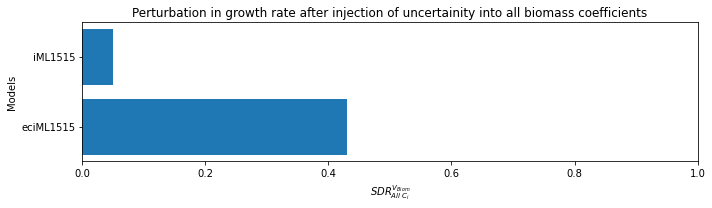

In [38]:
#Biomass Objective Function comparison:
BiomassUncertain = LookUpValue(df=dfmine)
BiomassUncertainExample = LookUpValue(df=dftheirs)

plotlist = []
plotlist.append(float(BiomassUncertain))
plotlist.append(float(BiomassUncertainExample))
namelist = []
namelist.append('eciML1515')
namelist.append('iML1515')
plt.barh(namelist, plotlist)
plt.xlim(0, 1)
plt.xlabel('$SDR^{V_{Biom}}_{All\: C_{i}}$')
plt.ylabel('Models')

plt.title('Perturbation in growth rate after injection of uncertainity into all biomass coefficients')

plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True

plt.savefig('GRPertModels.pdf')

In [92]:
#Biomass Objective Function comparison:
ATPReaction = 'TotalATPFlux'
NADHReaction = 'TotalNADHFlux'
NADPHReaction = 'TotalNADPHFlux'

ATP = LookUpValue(df=dfmine, Reaction = 'TotalATPFlux')
NADH = LookUpValue(df=dfmine, Reaction = 'TotalNADHFlux')
NADPH = LookUpValue(df=dfmine, Reaction = 'TotalNADPHFlux')

plotlist = []
print(ATP)
plotlist.append(float(ATP))
plotlist.append(float(NADH))
plotlist.append(float(NADPH))
namelist = []
namelist.append('MyData')
namelist.append('TheirData')
plt.barh(namelist, plotlist)
plt.xlim(0, 1)


plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True

Series([], Name: Stdev_slope, dtype: float64)


TypeError: cannot convert the series to <class 'float'>

In [ ]:
looklist = ['Mean_0.05', 'Mean_0.1','Mean_0.2', 'Mean_0.3']
plotlist = []

for x in looklist:
    plotlist.append(float(df.loc[df['Unnamed: 0'] == BMReaction, x]))
    
plt.bar(looklist, plotlist)
plt.ylim(0.19,0.2)

In [ ]:
looklist = ['Mean_0.05', 'Mean_0.1','Mean_0.2', 'Mean_0.3']
plotlist = []

for x in looklist:
    plotlist.append(float(df1.loc[df['Unnamed: 0'] == BMReaction, x]))
    
plt.bar(looklist, plotlist)
plt.ylim(6.8595,6.8602)

In [ ]:
#Some Uptake Functions comparison:
looklist = ['Mean_0.05', 'Mean_0.1','Mean_0.2', 'Mean_0.3']
plotlist = []
LookFor = 'EX_glc__D_e_REV'

for x in looklist:
    plotlist.append(float(df.loc[df['Unnamed: 0'] == LookFor, x]))
    
plt.bar(looklist, plotlist)
plt.ylim(28, 29)

In [ ]:
looklist = ['Mean_0.05', 'Mean_0.1','Mean_0.2', 'Mean_0.3']
plotlist = []
LookFor = 'EX_glc__D_e'

for x in looklist:
    plotlist.append(float(abs(df1.loc[df1['Unnamed: 0'] == LookFor, x])))
     
plt.bar(looklist, plotlist)
plt.ylim(9.5, 10.5)

In [ ]:
#Step 2: After applying uncertainty to a single biomass constituent and perform data analysis on said thing
#seeing how said "one-at-a-time" noise injections would affect the biomass yield and other interesting reactions
#
#

In [ ]:
atpdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\atp_c\dfFluxStat.csv', sep = '\t')
ctpdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\ctp_c\dfFluxStat.csv', sep = '\t')
gtpdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\gtp_c\dfFluxStat.csv', sep = '\t')
utpdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\utp_c\dfFluxStat.csv', sep = '\t')
df1 = pd.read_csv('dfFluxStatExample.csv', sep = '\t')

In [ ]:
#Biomass Uncertainty Value:
BMReaction = 'BIOMASS_Ec_iML1515_core_75p37M'

ATPBiomassUncertain = atpdf.loc[atpdf['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(ATPBiomassUncertain)

CTPBiomassUncertain = ctpdf.loc[ctpdf['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(CTPBiomassUncertain)

GTPBiomassUncertain = gtpdf.loc[gtpdf['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(GTPBiomassUncertain)

UTPBiomassUncertain = utpdf.loc[utpdf['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(UTPBiomassUncertain)

BiomassUncertainExample = df1.loc[df1['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(BiomassUncertainExample)

In [ ]:
Metabolites = ['utp', 'gtp', 'ctp', 'atp']

Values = [float(UTPBiomassUncertain), float(GTPBiomassUncertain), float(CTPBiomassUncertain), float(ATPBiomassUncertain)]

plt.barh(Metabolites, Values)
plt.title('SDR Biom')
plt.ylabel('Metabolites')
plt.xlabel('Uncertain%')
plt.show()

In [ ]:
ATPReaction = 'TotalATPFlux'

ATPATPReaction = atpdf.loc[atpdf['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
print(ATPATPReaction)

#CTPATPReaction = ctpdf.loc[ctpdf['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
#print(CTPATPReaction)

#GTPATPReaction = gtpdf.loc[gtpdf['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
#print(GTPATPReaction)

#UTPATPReaction = utpdf.loc[utpdf['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
#print(UTPATPReaction)

#BiomassUncertainExample = df1.loc[df1['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
#print(BiomassUncertainExample)

In [ ]:
#Metabolites = ['utp', 'gtp', 'ctp', 'atp']

#Values = [float(UTPATPReaction), float(GTPATPReaction), float(CTPATPReaction), float(ATPATPReaction)]

Metabolites = ['atp']

Values = [float(ATPATPReaction)]

plt.barh(Metabolites, Values)
plt.title('SDR ATP')
plt.ylabel('Metabolites')
plt.xlabel('Uncertain%')
plt.show()

In [ ]:
NADHReaction = 'GAPDNo1'

ATPNADHReaction = atpdf.loc[atpdf['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
print(ATPNADHReaction)

CTPNADHReaction = ctpdf.loc[ctpdf['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
print(CTPNADHReaction)

GTPNADHReaction = gtpdf.loc[gtpdf['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
print(GTPNADHReaction)

UTPNADHReaction = utpdf.loc[utpdf['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
print(UTPNADHReaction)

#BiomassUncertainExample = df1.loc[df1['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
#print(BiomassUncertainExample)

In [ ]:
Metabolites = ['utp', 'gtp', 'ctp', 'atp']

Values = [float(UTPNADHReaction), float(GTPNADHReaction), float(CTPNADHReaction), float(ATPNADHReaction)]

plt.barh(Metabolites, Values)
plt.title('SDR NADH')
plt.ylabel('Metabolites')
plt.xlabel('Uncertain%')
plt.show()

In [ ]:
Attemptdf = pd.read_csv(r'C:\Users\Helge\MasterProject\ftype-dfFlux_CoeffStd-0.05_added.csv', sep = '\t')

In [ ]:
print(Attemptdf)

In [ ]:
print(df)

In [ ]:
import cobra, os
import pandas as pd
import numpy as np

from collections import OrderedDict
from copy import deepcopy

from sklearn.linear_model import LinearRegression

In [ ]:
print(Attemptdf.columns.to_list())
rxns = sorted(list(set(rxns)))

In [ ]:
path = './output/'

stds_coeff = ['0.05', '0.1', '0.2', '0.3']

In [ ]:
dfs = OrderedDict.fromkeys(stds_coeff)
for std in stds_coeff:
    fname = 'ftype-dfFlux_CoeffStd-' + std + '_added.csv'
    fpath = os.path.join(path, fname)
    df = pd.read_csv(fpath, sep='\t', index_col=0)
    df = df.fillna(0)
    dfs[std] = df

In [ ]:
rxns = sum([df.columns.to_list() for df in dfs.values()], [])
rxns = sorted(list(set(rxns)))
print(rxns)
temp = deepcopy(dfs)
dfs = OrderedDict.fromkeys(stds_coeff)
for std in stds_coeff:
    dfs[std] = pd.DataFrame(index=range(0,10001), columns=rxns)
    dfs[std].update(temp[std])
    dfs[std] = dfs[std].fillna(0)

In [ ]:
dfAmICrazy = pd.read_csv(r'C:\Users\Helge\MasterProject\dfFluxStat.csv', sep = '\t')

In [ ]:
print(dfAmICrazy)

In [ ]:
BMReaction = 'TotalATPFlux'

ATPBiomassUncertain = dfAmICrazy.loc[dfAmICrazy['Unnamed: 0'] == BMReaction, 'Stdev_slope']
print(ATPBiomassUncertain)

In [4]:
#Fancy Graphs

atp_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\RNA\atp_c\NADH\dfFluxStat.csv', sep = '\t')
ctp_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\RNA\ctp_c\NADH\dfFluxStat.csv', sep = '\t')
gtp_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\RNA\gtp_c\NADH\dfFluxStat.csv', sep = '\t')
utp_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\RNA\utp_c\NADH\dfFluxStat.csv', sep = '\t')

datp_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\DNA\datp_c\dfFluxStat.csv', sep = '\t')
dctp_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\DNA\dctp_c\dfFluxStat.csv', sep = '\t')
dgtp_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\DNA\dgtp_c\dfFluxStat.csv', sep = '\t')
dttp_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\DNA\dttp_c\dfFluxStat.csv', sep = '\t')

ala__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\ala__L_c\dfFluxStat.csv', sep = '\t')
arg__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\arg__L_c\dfFluxStat.csv', sep = '\t')
asn__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\asn__L_c\dfFluxStat.csv', sep = '\t')
asp__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\asp__L_c\dfFluxStat.csv', sep = '\t')
cys__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\cys__L_c\dfFluxStat.csv', sep = '\t')
gln__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\gln__L_c\dfFluxStat.csv', sep = '\t')
glu__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\glu__L_c\dfFluxStat.csv', sep = '\t')
gly_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\gly_c\dfFluxStat.csv', sep = '\t')
his__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\his__L_c\dfFluxStat.csv', sep = '\t')
ile__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\ile__L_c\dfFluxStat.csv', sep = '\t')
leu__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\leu__L_c\dfFluxStat.csv', sep = '\t')
lys__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\lys__L_c\dfFluxStat.csv', sep = '\t')
met__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\met__L_c\dfFluxStat.csv', sep = '\t')
phe__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\phe__L_c\dfFluxStat.csv', sep = '\t')
pro__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\pro__L_c\dfFluxStat.csv', sep = '\t')
ser__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\ser__L_c\dfFluxStat.csv', sep = '\t')
thr__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\thr__L_c\dfFluxStat.csv', sep = '\t')
trp__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\trp__L_c\dfFluxStat.csv', sep = '\t')
tyr__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\tyr__L_c\dfFluxStat.csv', sep = '\t')
val__L_c_df = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\AminoAcids\val__L_c\dfFluxStat.csv', sep = '\t')


In [5]:
BMReaction = 'BIOMASS_Ec_iML1515_core_75p37M'
ATPReaction = 'TotalATPFlux'
NADHReaction = 'TotalNADHFlux'
NADPHReaction = 'TotalNADPHFlux'

atp_df_bm = atp_df.loc[atp_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
atp_df_atp = atp_df.loc[atp_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
atp_df_nadh = atp_df.loc[atp_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
atp_df_nadph = atp_df.loc[atp_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

ctp_df_bm = ctp_df.loc[ctp_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
ctp_df_atp = ctp_df.loc[ctp_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
ctp_df_nadh = ctp_df.loc[ctp_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
ctp_df_nadph = ctp_df.loc[ctp_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

gtp_df_bm = gtp_df.loc[gtp_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
gtp_df_atp = gtp_df.loc[gtp_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
gtp_df_nadh = gtp_df.loc[gtp_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
gtp_df_nadph = gtp_df.loc[gtp_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

utp_df_bm = utp_df.loc[utp_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
utp_df_atp = utp_df.loc[utp_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
utp_df_nadh = utp_df.loc[utp_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
utp_df_nadph = utp_df.loc[utp_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']


datp_df_bm = datp_df.loc[datp_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
datp_df_atp = datp_df.loc[datp_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
datp_df_nadh = datp_df.loc[datp_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
datp_df_nadph = datp_df.loc[datp_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

dctp_df_bm = dctp_df.loc[dctp_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
dctp_df_atp = dctp_df.loc[dctp_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
dctp_df_nadh = dctp_df.loc[dctp_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
dctp_df_nadph = dctp_df.loc[dctp_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

dgtp_df_bm = dgtp_df.loc[dgtp_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
dgtp_df_atp = dgtp_df.loc[dgtp_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
dgtp_df_nadh = dgtp_df.loc[dgtp_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
dgtp_df_nadph = dgtp_df.loc[dgtp_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

dttp_df_bm = dttp_df.loc[dttp_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
dttp_df_atp = dttp_df.loc[dttp_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
dttp_df_nadh = dttp_df.loc[dttp_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
dttp_df_nadph = dttp_df.loc[dttp_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']


ala__L_c_df_bm = ala__L_c_df.loc[ala__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
ala__L_c_df_atp = ala__L_c_df.loc[ala__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
ala__L_c_df_nadh = ala__L_c_df.loc[ala__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
ala__L_c_df_nadph = ala__L_c_df.loc[ala__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

arg__L_c_df_bm = arg__L_c_df.loc[arg__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
arg__L_c_df_atp = arg__L_c_df.loc[arg__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
arg__L_c_df_nadh = arg__L_c_df.loc[arg__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
arg__L_c_df_nadph = arg__L_c_df.loc[arg__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

asn__L_c_df_bm = asn__L_c_df.loc[asn__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
asn__L_c_df_atp = asn__L_c_df.loc[asn__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
asn__L_c_df_nadh = asn__L_c_df.loc[asn__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
asn__L_c_df_nadph = asn__L_c_df.loc[asn__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

asp__L_c_df_bm = asp__L_c_df.loc[asp__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
asp__L_c_df_atp = asp__L_c_df.loc[asp__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
asp__L_c_df_nadh = asp__L_c_df.loc[asp__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
asp__L_c_df_nadph = asp__L_c_df.loc[asp__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

cys__L_c_df_bm = cys__L_c_df.loc[cys__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
cys__L_c_df_atp = cys__L_c_df.loc[cys__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
cys__L_c_df_nadh = cys__L_c_df.loc[cys__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
cys__L_c_df_nadph = cys__L_c_df.loc[cys__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

gln__L_c_df_bm = gln__L_c_df.loc[gln__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
gln__L_c_df_atp = gln__L_c_df.loc[gln__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
gln__L_c_df_nadh = gln__L_c_df.loc[gln__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
gln__L_c_df_nadph = gln__L_c_df.loc[gln__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

glu__L_c_df_bm = glu__L_c_df.loc[glu__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
glu__L_c_df_atp = glu__L_c_df.loc[glu__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
glu__L_c_df_nadh = glu__L_c_df.loc[glu__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
glu__L_c_df_nadph = glu__L_c_df.loc[glu__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

gly_c_df_bm = gly_c_df.loc[gly_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
gly_c_df_atp = gly_c_df.loc[gly_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
gly_c_df_nadh = gly_c_df.loc[gly_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
gly_c_df_nadph = gly_c_df.loc[gly_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

his__L_c_df_bm = his__L_c_df.loc[his__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
his__L_c_df_atp = his__L_c_df.loc[his__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
his__L_c_df_nadh = his__L_c_df.loc[his__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
his__L_c_df_nadph = his__L_c_df.loc[his__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

ile__L_c_df_bm = ile__L_c_df.loc[ile__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
ile__L_c_df_atp = ile__L_c_df.loc[ile__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
ile__L_c_df_nadh = ile__L_c_df.loc[ile__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
ile__L_c_df_nadph = ile__L_c_df.loc[ile__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

leu__L_c_df_bm = leu__L_c_df.loc[leu__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
leu__L_c_df_atp = leu__L_c_df.loc[leu__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
leu__L_c_df_nadh = leu__L_c_df.loc[leu__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
leu__L_c_df_nadph = leu__L_c_df.loc[leu__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

lys__L_c_df_bm = lys__L_c_df.loc[lys__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
lys__L_c_df_atp = lys__L_c_df.loc[lys__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
lys__L_c_df_nadh = lys__L_c_df.loc[lys__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
lys__L_c_df_nadph = lys__L_c_df.loc[lys__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

met__L_c_df_bm = met__L_c_df.loc[met__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
met__L_c_df_atp = met__L_c_df.loc[met__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
met__L_c_df_nadh = met__L_c_df.loc[met__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
met__L_c_df_nadph = met__L_c_df.loc[met__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

phe__L_c_df_bm = phe__L_c_df.loc[phe__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
phe__L_c_df_atp = phe__L_c_df.loc[phe__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
phe__L_c_df_nadh = phe__L_c_df.loc[phe__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
phe__L_c_df_nadph = phe__L_c_df.loc[phe__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

pro__L_c_df_bm = pro__L_c_df.loc[pro__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
pro__L_c_df_atp = pro__L_c_df.loc[pro__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
pro__L_c_df_nadh = pro__L_c_df.loc[pro__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
pro__L_c_df_nadph = pro__L_c_df.loc[pro__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

ser__L_c_df_bm = ser__L_c_df.loc[ser__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
ser__L_c_df_atp = ser__L_c_df.loc[ser__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
ser__L_c_df_nadh = ser__L_c_df.loc[ser__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
ser__L_c_df_nadph = ser__L_c_df.loc[ser__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

thr__L_c_df_bm = thr__L_c_df.loc[thr__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
thr__L_c_df_atp = thr__L_c_df.loc[thr__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
thr__L_c_df_nadh = thr__L_c_df.loc[thr__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
thr__L_c_df_nadph = thr__L_c_df.loc[thr__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

trp__L_c_df_bm = trp__L_c_df.loc[trp__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
trp__L_c_df_atp = trp__L_c_df.loc[trp__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
trp__L_c_df_nadh = trp__L_c_df.loc[trp__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
trp__L_c_df_nadph = trp__L_c_df.loc[trp__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

tyr__L_c_df_bm = tyr__L_c_df.loc[tyr__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
tyr__L_c_df_atp = tyr__L_c_df.loc[tyr__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
tyr__L_c_df_nadh = tyr__L_c_df.loc[tyr__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
tyr__L_c_df_nadph = tyr__L_c_df.loc[tyr__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']

val__L_c_df_bm = val__L_c_df.loc[val__L_c_df['Unnamed: 0'] == BMReaction, 'Stdev_slope']
val__L_c_df_atp = val__L_c_df.loc[val__L_c_df['Unnamed: 0'] == ATPReaction, 'Stdev_slope']
val__L_c_df_nadh = val__L_c_df.loc[val__L_c_df['Unnamed: 0'] == NADHReaction, 'Stdev_slope']
val__L_c_df_nadph = val__L_c_df.loc[val__L_c_df['Unnamed: 0'] == NADPHReaction, 'Stdev_slope']



In [55]:
plt.rcParams['figure.figsize'] = [10, 10]

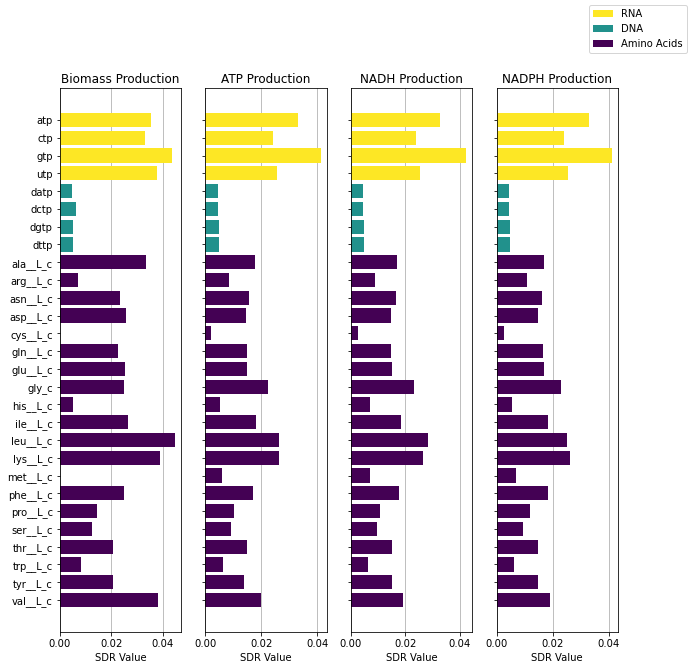

In [69]:
y = ['atp', 'ctp', 'gtp', 'utp', 'datp', 'dctp', 'dgtp', 'dttp', 'ala__L_c', 'arg__L_c', 'asn__L_c', 'asp__L_c','cys__L_c', 'gln__L_c','glu__L_c', 'gly_c', 'his__L_c', 'ile__L_c', 'leu__L_c', 'lys__L_c', 'met__L_c', 'phe__L_c', 'pro__L_c', 'ser__L_c', 'thr__L_c', 'trp__L_c', 'tyr__L_c', 'val__L_c']
#y = np.arange(len(metabolites))
x1 = [float(atp_df_bm), float(ctp_df_bm), float(gtp_df_bm), float(utp_df_bm), float(datp_df_bm), float(dctp_df_bm), float(dgtp_df_bm), float(dttp_df_bm), float(ala__L_c_df_bm), float(arg__L_c_df_bm), float(asn__L_c_df_bm), float(asp__L_c_df_bm), float(cys__L_c_df_bm), float(gln__L_c_df_bm), float(glu__L_c_df_bm), float(gly_c_df_bm), float(his__L_c_df_bm), float(ile__L_c_df_bm), float(leu__L_c_df_bm), float(lys__L_c_df_bm), float(met__L_c_df_bm), float(phe__L_c_df_bm), float(pro__L_c_df_bm), float(ser__L_c_df_bm), float(thr__L_c_df_bm), float(trp__L_c_df_bm), float(tyr__L_c_df_bm), float(val__L_c_df_bm)]
x2 = [float(atp_df_atp), float(ctp_df_atp), float(gtp_df_atp), float(utp_df_atp), float(datp_df_atp), float(dctp_df_atp), float(dgtp_df_atp), float(dttp_df_atp), float(ala__L_c_df_atp), float(arg__L_c_df_atp), float(asn__L_c_df_atp), float(asp__L_c_df_atp), float(cys__L_c_df_atp), float(gln__L_c_df_atp), float(glu__L_c_df_atp), float(gly_c_df_atp), float(his__L_c_df_atp), float(ile__L_c_df_atp), float(leu__L_c_df_atp), float(lys__L_c_df_atp), float(met__L_c_df_atp), float(phe__L_c_df_atp), float(pro__L_c_df_atp), float(ser__L_c_df_atp), float(thr__L_c_df_atp), float(trp__L_c_df_atp), float(tyr__L_c_df_atp), float(val__L_c_df_atp)]
x3 = [float(atp_df_nadh), float(ctp_df_nadh), float(gtp_df_nadh), float(utp_df_nadh), float(datp_df_nadh), float(dctp_df_nadh), float(dgtp_df_nadh), float(dttp_df_nadh), float(ala__L_c_df_nadh), float(arg__L_c_df_nadh), float(asn__L_c_df_nadh), float(asp__L_c_df_nadh), float(cys__L_c_df_nadh), float(gln__L_c_df_nadh), float(glu__L_c_df_nadh), float(gly_c_df_nadh), float(his__L_c_df_nadh), float(ile__L_c_df_nadh), float(leu__L_c_df_nadh), float(lys__L_c_df_nadh), float(met__L_c_df_nadh), float(phe__L_c_df_nadh), float(pro__L_c_df_nadh), float(ser__L_c_df_nadh), float(thr__L_c_df_nadh), float(trp__L_c_df_nadh), float(tyr__L_c_df_nadh), float(val__L_c_df_nadh)]
x4 = [float(atp_df_nadph), float(ctp_df_nadph), float(gtp_df_nadph), float(utp_df_nadph), float(datp_df_nadph), float(dctp_df_nadph), float(dgtp_df_nadph), float(dttp_df_nadph), float(ala__L_c_df_nadph), float(arg__L_c_df_nadph), float(asn__L_c_df_nadph), float(asp__L_c_df_nadph), float(cys__L_c_df_nadph), float(gln__L_c_df_nadph), float(glu__L_c_df_nadph), float(gly_c_df_nadph), float(his__L_c_df_nadph), float(ile__L_c_df_nadph), float(leu__L_c_df_nadph), float(lys__L_c_df_nadph), float(met__L_c_df_nadph), float(phe__L_c_df_nadph), float(pro__L_c_df_nadph), float(ser__L_c_df_nadph), float(thr__L_c_df_nadph), float(trp__L_c_df_nadph), float(tyr__L_c_df_nadph), float(val__L_c_df_nadph)]
colormap = ['#fde725', '#fde725', '#fde725', '#fde725', '#21918c', '#21918c', '#21918c', '#21918c', '#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154','#440154']
groups = ['RNA', 'DNA', 'Amino Acids']
groupcolor = ['#fde725', '#21918c', '#440154']

#print(x1)
fig, axes = plt.subplots(ncols=4, sharey=True)
axes[0].barh(y, x1, align='center', color=colormap)
#axes[0].invert_yaxis()
axes[0].set_title('Biomass Production')
axes[1].barh(y, x2, align='center', color = colormap)
#axes[1].invert_yaxis()
axes[1].set_title('ATP Production')
axes[2].barh(y, x3, align='center', color = colormap)
#axes[2].invert_yaxis()
axes[2].set_title('NADH Production')
axes[3].barh(y, x4, align='center', color = colormap)
#axes[3].invert_yaxis()
axes[3].set_title('NADPH Production')

axes[0].invert_yaxis()
for ax in axes:
    ax.set_xlabel('SDR Value')
    ax.grid(visible=True, axis = 'x')
    ax.set_axisbelow(True)
from matplotlib.patches import Patch
custom_lines = [Patch(facecolor = '#fde725'),
               Patch(facecolor = '#21918c'),
               Patch(facecolor = '#440154')]
fig.legend(custom_lines, ['RNA', 'DNA', 'Amino Acids'])
plt.grid(visible=True, axis='x')
#ax[0].set_axisbelow(True)
plt.show()
fig.savefig('GraphThingy.pdf')

# d = {'Metabolite Name':y, 'SDR BM':x1, 'SDR ATP':x2, 'SDR NADH':x3, 'SDR NADPH':x4}
ComparisonDF = pd.DataFrame(data=d)
print(ComparisonDF)

In [67]:
import os
os.getcwd()

'C:\\Users\\Helge\\MasterProject'

In [ ]:

y=metabolites
 
# getting values against each value of y
x=[5,24,35,67,12]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("pen sold")
 
# setting label of x-axis
plt.xlabel("price")
plt.title("Horizontal bar graph")
plt.show()

In [46]:
testing = pd.read_csv(r'C:\Users\Helge\MasterProject\Example\uncBiom\SingleCoeffVary\output\ftype-dfFlux_CoeffStd-0.1.csv', sep = '\t')
testing

,Unnamed: 0,SHCHD2,CPPPGO,PFK_3,LEUTAi,SHK3Dr,G5SD,APRAUR,DB4PS,RBFK,...,PYK3,PYK4,AI2K,PIt2rpp,PYK6,PAI2I,4HTHRK,4HTHRA,PAI2T,BIOMASS_Ec_iML1515_core_75p37M
0,0,0.000191,0.000191,0.980311,0.391805,0.331431,0.192245,0.000383,0.000765,0.000191,...,0.687422,0.157832,0.000470,0.838688,0.022760,0.000470,0.000574,-0.000574,0.000470,0.869692
1,1,0.000189,0.000189,0.990943,0.387464,0.327757,0.190116,0.000378,0.000756,0.000189,...,0.679802,0.165759,0.000464,0.839075,0.022508,0.000464,0.000567,-0.000567,0.000464,0.866722
2,2,0.000191,0.000191,0.982784,0.390814,0.330594,0.191759,0.000382,0.000765,0.000191,...,0.685689,0.159651,0.000469,0.838782,0.022702,0.000469,0.000574,-0.000574,0.000469,0.868993
3,3,0.000190,0.000190,0.986264,0.389385,0.329385,0.191058,0.000380,0.000760,0.000190,...,0.683178,0.162259,0.000467,0.838903,0.022619,0.000467,0.000570,-0.000570,0.000467,0.868024
4,4,0.000189,0.000189,0.993763,0.386304,0.326778,0.189546,0.000378,0.000755,0.000189,...,0.677770,0.167878,0.000463,0.839176,0.022441,0.000463,0.000566,-0.000566,0.000463,0.865934
5,5,0.000189,0.000189,0.991559,0.387211,0.327544,0.189991,0.000378,0.000756,0.000189,...,0.679358,0.166221,0.000464,0.839093,0.022493,0.000464,0.000567,-0.000567,0.000464,0.866550
6,6,0.000193,0.000193,0.974399,0.394259,0.333507,0.193450,0.000385,0.000770,0.000193,...,0.691726,0.153360,0.000472,0.838481,0.022902,0.000472,0.000578,-0.000578,0.000472,0.871331
7,7,0.000190,0.000190,0.986093,0.389457,0.329444,0.191093,0.000380,0.000760,0.000190,...,0.683304,0.162130,0.000467,0.838899,0.022624,0.000467,0.000570,-0.000570,0.000467,0.868073
8,8,0.000191,0.000191,0.979445,0.392187,0.331753,0.192433,0.000383,0.000766,0.000191,...,0.688088,0.157143,0.000470,0.838661,0.022782,0.000470,0.000574,-0.000574,0.000470,0.869926
9,9,0.000191,0.000191,0.979738,0.392066,0.331651,0.192374,0.000383,0.000765,0.000191,...,0.687878,0.157363,0.000470,0.838671,0.022775,0.000470,0.000574,-0.000574,0.000470,0.869843


In [45]:
testing = pd.read_csv(r'C:\Users\Helge\MasterProject\Example\uncBiom\SingleCoeffVary\output\ftype-dfFlux_CoeffStd-0.1.csv', sep = '\t')
testing

#for col in testing.columns:
#    print(col)

,Unnamed: 0,SHCHD2,CPPPGO,PFK_3,LEUTAi,SHK3Dr,G5SD,APRAUR,DB4PS,RBFK,...,PYK3,PYK4,AI2K,PIt2rpp,PYK6,PAI2I,4HTHRK,4HTHRA,PAI2T,BIOMASS_Ec_iML1515_core_75p37M
0,0,0.000191,0.000191,0.980311,0.391805,0.331431,0.192245,0.000383,0.000765,0.000191,...,0.687422,0.157832,0.000470,0.838688,0.022760,0.000470,0.000574,-0.000574,0.000470,0.869692
1,1,0.000189,0.000189,0.990943,0.387464,0.327757,0.190116,0.000378,0.000756,0.000189,...,0.679802,0.165759,0.000464,0.839075,0.022508,0.000464,0.000567,-0.000567,0.000464,0.866722
2,2,0.000191,0.000191,0.982784,0.390814,0.330594,0.191759,0.000382,0.000765,0.000191,...,0.685689,0.159651,0.000469,0.838782,0.022702,0.000469,0.000574,-0.000574,0.000469,0.868993
3,3,0.000190,0.000190,0.986264,0.389385,0.329385,0.191058,0.000380,0.000760,0.000190,...,0.683178,0.162259,0.000467,0.838903,0.022619,0.000467,0.000570,-0.000570,0.000467,0.868024
4,4,0.000189,0.000189,0.993763,0.386304,0.326778,0.189546,0.000378,0.000755,0.000189,...,0.677770,0.167878,0.000463,0.839176,0.022441,0.000463,0.000566,-0.000566,0.000463,0.865934
5,5,0.000189,0.000189,0.991559,0.387211,0.327544,0.189991,0.000378,0.000756,0.000189,...,0.679358,0.166221,0.000464,0.839093,0.022493,0.000464,0.000567,-0.000567,0.000464,0.866550
6,6,0.000193,0.000193,0.974399,0.394259,0.333507,0.193450,0.000385,0.000770,0.000193,...,0.691726,0.153360,0.000472,0.838481,0.022902,0.000472,0.000578,-0.000578,0.000472,0.871331
7,7,0.000190,0.000190,0.986093,0.389457,0.329444,0.191093,0.000380,0.000760,0.000190,...,0.683304,0.162130,0.000467,0.838899,0.022624,0.000467,0.000570,-0.000570,0.000467,0.868073
8,8,0.000191,0.000191,0.979445,0.392187,0.331753,0.192433,0.000383,0.000766,0.000191,...,0.688088,0.157143,0.000470,0.838661,0.022782,0.000470,0.000574,-0.000574,0.000470,0.869926
9,9,0.000191,0.000191,0.979738,0.392066,0.331651,0.192374,0.000383,0.000765,0.000191,...,0.687878,0.157363,0.000470,0.838671,0.022775,0.000470,0.000574,-0.000574,0.000470,0.869843


In [47]:
testing = pd.read_csv(r'C:\Users\Helge\MasterProject\Example\uncBiom\SingleCoeffVary\output\comp\ftype-dfFlux_CoeffStd-0.1.csv', sep = '\t')
testing

,Unnamed: 0,EX_h_e,EX_co2_e,EX_pyr_e,DNMPPA,EX_glyclt_e,G5SADs,FTHFLi,O2tpp,Kt2pp,...,ACt2rpp_REV,GLUt4pp,GLUt2rpp_REV,DHORD5No1,QMO3No1,NADPHQR3,EX_lac__D_e,D_LACtex_REV,D_LACt2pp_REV,LDH_D_REVNo1
0,0,55.026046,0.149808,53.244924,0.000130,0.000086,0.042853,0.257100,26.036426,0.037839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,55.197650,0.149649,53.408498,0.000130,0.000086,0.042806,0.256822,26.103957,0.037798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,55.062926,0.149771,53.279955,0.000130,0.000087,0.042842,0.257037,26.050704,0.037830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,55.120927,0.149720,53.335299,0.000129,0.000086,0.042828,0.256950,26.073689,0.037817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,55.245852,0.149605,53.454492,0.000129,0.000086,0.042795,0.256753,26.123091,0.037788,...,0.001008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,54.844635,0.149973,53.071690,0.000130,0.000086,0.042901,0.257388,25.964451,0.037882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9997,55.027849,0.149802,53.246491,0.000130,0.000086,0.042852,0.257095,26.036860,0.037838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9998,55.074210,0.149762,53.290718,0.000130,0.000087,0.042839,0.257017,26.055147,0.037827,...,0.001009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,9999,55.020314,0.149814,53.239301,0.000130,0.000086,0.042854,0.257105,26.033879,0.037840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
for count, x in enumerate(testing):
    print(x)
    for y in testing[x]:
        if  y < 0:
            print(x, y)

Unnamed: 0
EX_h_e
EX_co2_e
EX_pyr_e
DNMPPA
EX_glyclt_e
G5SADs
FTHFLi
O2tpp
Kt2pp
Ktex
O2tex
GLCtex_copy1
PItex
SO4tex
NH4tex
FE2tex
GRXR
MOBDtex
NI2tex
R1PK
NH4tpp
MG2tex
Zn2tex
NADPHQR2
GLYCLTt4pp
COBALT2tex
GLCt2pp
EX_h2o_e
ATPM
OMCDC
EX_etoh_e
CLtex
MNtex
THMtex
DHORDfum
PDX5PO2
DM_5drib_c
SO4t2pp
CA2tex
CUtex
CU1Opp
COBALT2tpp
ZN2tpp
NI2tpp
DALAt2pp
FE2tpp
MN2tpp
CU2tpp
MG2t3_2pp
CLt3_2pp
MTHTHFSs
S2FE2ST
S4FE4ST
FESD1s
DHPTDCs2
DM_mththf_c
S4FE4SR
FESR
BTNt2ipp
BTNtex
PIt2rpp
MOX
BIOMASS_Ec_iML1515_core_75p37M
EX_pi_e_REV
EX_mn2_e_REV
EX_btn_e_REV
EX_fe2_e_REV
EX_glc__D_e_REV
EX_thm_e_REV
EX_zn2_e_REV
EX_mg2_e_REV
GLYCLTtex_REV
Htex_REV
H2Otex_REV
PYRt2rpp_REV
EX_ca2_e_REV
CO2tpp_REV
EX_ni2_e_REV
PYRtex_REV
CO2tex_REV
EX_cobalt2_e_REV
H2Otpp_REV
ETOHtex_REV
EX_nh4_e_REV
GLYCLTt2rpp_REV
EX_mobd_e_REV
EX_so4_e_REV
EX_k_e_REV
EX_o2_e_REV
EX_cu_e_REV
EX_cl_e_REV
CAt6pp_REV
ETOHtrpp_REV
SHCHD2No1
GTHOrNo1
arm_LEUTAi
LEUTAiNo2
SHK3DrNo1
G5SDNo1
APRAURNo1
DB4PSNo1
RBFKNo1
RBFSbNo1
DMATTN

draw_prot_P17846
draw_prot_P17854
draw_prot_P17952
draw_prot_P18843
draw_prot_P19624
draw_prot_P21156
draw_prot_P21179
draw_prot_P21599
draw_prot_P21645
draw_prot_P22188
draw_prot_P22255
draw_prot_P22634
draw_prot_P22939
draw_prot_P23830
draw_prot_P23845
draw_prot_P23893
draw_prot_P23908
draw_prot_P24182
draw_prot_P24186
draw_prot_P26281
draw_prot_P26602
draw_prot_P26647
draw_prot_P27247
draw_prot_P27300
draw_prot_P27302
draw_prot_P27550
draw_prot_P28903
draw_prot_P29012
draw_prot_P29680
draw_prot_P30011
draw_prot_P30125
draw_prot_P31057
draw_prot_P31120
draw_prot_P31554
draw_prot_P31663
draw_prot_P33221
draw_prot_P36683
draw_prot_P37306
draw_prot_P37351
draw_prot_P38038
draw_prot_P39451
draw_prot_P43341
draw_prot_P45568
draw_prot_P45578
draw_prot_P46022
draw_prot_P50457
draw_prot_P52043
draw_prot_P52647
draw_prot_P52697
draw_prot_P60472
draw_prot_P60546
draw_prot_P60595
draw_prot_P60664
draw_prot_P60752
draw_prot_P60757
draw_prot_P60782
draw_prot_P61889
draw_prot_P62615
draw_prot_P626

In [88]:
testing = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\dfFluxStat-BiomassComp.csv', sep = '\t')
testing2 = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\MacroVary\dfFluxStat.csv', sep = '\t')

In [95]:
#SDRReaction11 = 'arm_TKT1_REV'
print(LookUpValue(df = testing, Reaction = 'arm_TKT1_REV'))
print(LookUpValue(df = testing, Reaction = 'arm_TKT1_REV', Column = 'R2'))

print(LookUpValue(df = testing2, Reaction = 'arm_TKT1_REV'))
print(LookUpValue(df = testing2, Reaction = 'arm_TKT1_REV', Column = 'R2'))

print('testing1')
print(LookUpValue(df = testing, Reaction = 'BIOMASS_Ec_iML1515_core_75p37M'))
print(LookUpValue(df = testing, Reaction = 'BIOMASS_Ec_iML1515_core_75p37M', Column = 'R2'))

print(LookUpValue(df = testing2, Reaction = 'BIOMASS_Ec_iML1515_core_75p37M'))
print(LookUpValue(df = testing2, Reaction = 'BIOMASS_Ec_iML1515_core_75p37M', Column = 'R2'))


520    0.835638
Name: Stdev_slope, dtype: float64
520    0.999882
Name: R2, dtype: float64
640    3.763035
Name: Stdev_slope, dtype: float64
640    0.583074
Name: R2, dtype: float64
testing1
83    0.429558
Name: Stdev_slope, dtype: float64
83    0.999434
Name: R2, dtype: float64
102    2.51756
Name: Stdev_slope, dtype: float64
102    0.972127
Name: R2, dtype: float64


In [91]:
file_name = 'MacroVary.xlsx'
testing2.to_excel(file_name)

In [78]:
BMDF = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\dfFluxStat-BiomassComp.csv', sep = '\t')
MacroDF = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\MacroVary\dfFluxStat.csv', sep = '\t')
GAMDF = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\GAMVary\dfFluxStat.csv', sep = '\t')
NGAMDF = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\NGAMVary\dfFluxStat.csv', sep = '\t')
dfs = {'BMDF':[BMDF], 'MacroDF': [MacroDF], 'GAMDF': [GAMDF], 'NGAMDF': [NGAMDF]}


In [79]:
print(dfs)

{'BMDF': [             Unnamed: 0  Stdev_slope        R2    Stdev_0.05     Stdev_0.1  \
0            3HAD100No2     0.168276  0.999107  5.431664e-04  1.091215e-03   
1            3HAD120No1     0.545870  0.999819  1.054047e-03  2.114072e-03   
2            3HAD121No2     0.773370  0.999610  1.078022e-03  2.161790e-03   
3            3HAD140No2     0.839606  0.999765  1.003865e-03  2.011914e-03   
4            3HAD141No2     0.773370  0.999610  1.078022e-03  2.161790e-03   
..                  ...          ...       ...           ...           ...   
757    draw_prot_P77444     1.086803  0.999930  3.800518e-09  7.619684e-09   
758    draw_prot_P77488     0.880118  0.999859  2.321596e-09  4.657008e-09   
759  prot_pool_exchange     0.000000  1.000000  1.387779e-17  1.387779e-17   
760           sumDHORDx     1.119752  0.999936  1.047343e-06  2.096952e-06   
761     sumSodiumImport     1.113274  0.999920  5.505390e-05  1.103387e-04   

        Stdev_0.2     Stdev_0.3     Mean_0.05      Me

In [222]:
for y in dfs.keys():
    print(dfs[y][0])
    LookUpValue(df = dfs[y], Reaction = x)
    print(y+'SDR')

             Unnamed: 0  Stdev_slope        R2    Stdev_0.05     Stdev_0.1  \
0            3HAD100No2     0.168276  0.999107  5.431664e-04  1.091215e-03   
1            3HAD120No1     0.545870  0.999819  1.054047e-03  2.114072e-03   
2            3HAD121No2     0.773370  0.999610  1.078022e-03  2.161790e-03   
3            3HAD140No2     0.839606  0.999765  1.003865e-03  2.011914e-03   
4            3HAD141No2     0.773370  0.999610  1.078022e-03  2.161790e-03   
..                  ...          ...       ...           ...           ...   
757    draw_prot_P77444     1.086803  0.999930  3.800518e-09  7.619684e-09   
758    draw_prot_P77488     0.880118  0.999859  2.321596e-09  4.657008e-09   
759  prot_pool_exchange     0.000000  1.000000  1.387779e-17  1.387779e-17   
760           sumDHORDx     1.119752  0.999936  1.047343e-06  2.096952e-06   
761     sumSodiumImport     1.113274  0.999920  5.505390e-05  1.103387e-04   

        Stdev_0.2     Stdev_0.3     Mean_0.05      Mean_0.1    

AttributeError: 'list' object has no attribute 'loc'

In [82]:
UpperGlycolysis = ['arm_GLCptspp', 'PGINo1', 'arm_PFK']
PPPathway = ['G6PDH2rNo1', 'PGLNo1', 'GNDNo1', 'RPE_REVNo1', 'arm_RPI_REV', 'arm_TKT1_REV', 'arm_TKT2_REV', 'PFK_3No1','FBA3No1']
LowerGlycolysis = ['GAPDNo1', 'PGK_REVNo1', 'arm_PGM_REV', 'ENONo1', 'PDHNo1', 'PPCNo1']
CitricAcidCycle = ['CSNo1', 'arm_ACONTa', 'arm_ACONTb', 'ICDHyrNo1','AKGDHNo1', 'SUCOASNo1', 'SUCDiNo1', 'arm_FUM', 'MDH_REVNo1']

results = {'Reaction':[], 'BMDFSDR':[], 'BMDFR2':[], 'MacroDFSDR':[], 'MacroDFR2':[], 'GAMDFSDR':[], 'GAMDFR2':[], 'NGAMDFSDR':[], 'NGAMDFR2':[]}
#for x in UpperGlycolysis:
#    results['Reaction'].append(x)
#    for y in dfs:
#        try:
#            SDR = float(LookUpValue(df = dfs[y][0], Reaction = x))
# if SDR == 'NaN':
#                results[y+'SDR'].append(0)
#                
#            results[y+'SDR'].append(SDR)
#        except:
#            results[y+'SDR'].append(0)
#            
#        try:
#            R2 = float(LookUpValue(df = dfs[y][0], Reaction = x, Column = 'R2'))
#            results[y+'R2'].append(R2)
#        except:
#            results[y+'R2'].append(0)

for x in LowerGlycolysis:
    results['Reaction'].append(x)
    for y in dfs:
        try:
            SDR = float(LookUpValue(df = dfs[y][0], Reaction = x))
            results[y+'SDR'].append(SDR)
        except:
            results[y+'SDR'].append(0)
            
        try:
            R2 = float(LookUpValue(df = dfs[y][0], Reaction = x, Column = 'R2'))
            results[y+'R2'].append(R2)
        except:
            results[y+'R2'].append(0)

for x in UpperGlycolysis:
    results['Reaction'].append(x)
    for y in dfs:
        try:
            SDR = float(LookUpValue(df = dfs[y][0], Reaction = x))
#            results[y+'SDR'].append(SDR)
            if x == 'arm_PFK':
                results[y+'SDR'].append(0)
            else:
                results[y+'SDR'].append(SDR)
        except:
            results[y+'SDR'].append(0)
            
        try:
            R2 = float(LookUpValue(df = dfs[y][0], Reaction = x, Column = 'R2'))
            if x == 'arm_PFK':
                results[y+'R2'].append(0)
            else:
                results[y+'R2'].append(R2)
        except:
            results[y+'R2'].append(0)
                    
for x in CitricAcidCycle:
    results['Reaction'].append(x)
    for y in dfs:
        try:
            SDR = float(LookUpValue(df = dfs[y][0], Reaction = x))
            results[y+'SDR'].append(SDR)
        except:
            results[y+'SDR'].append(0)
            
        try:
            R2 = float(LookUpValue(df = dfs[y][0], Reaction = x, Column = 'R2'))
            results[y+'R2'].append(R2)
        except:
            results[y+'R2'].append(0)
        
for x in PPPathway:
    results['Reaction'].append(x)
    for y in dfs:
        try:
            SDR = float(LookUpValue(df = dfs[y][0], Reaction = x))
            if x == 'PFK_3No1' or x == 'FBA3No1':
                results[y+'SDR'].append(0)
            else:
                results[y+'SDR'].append(SDR)
        except:
            results[y+'SDR'].append(0)
            
        try:
            R2 = float(LookUpValue(df = dfs[y][0], Reaction = x, Column = 'R2'))
            results[y+'R2'].append(R2)
        except:
            results[y+'R2'].append(0)
        
        
results1 = pd.DataFrame(data=results) 
results1

,Reaction,BMDFSDR,BMDFR2,MacroDFSDR,MacroDFR2,GAMDFSDR,GAMDFR2,NGAMDFSDR,NGAMDFR2
0,GAPDNo1,0.313008,0.999357,1.052315,0.986064,0.490837,0.999999,0.228456,0.999722
1,PGK_REVNo1,0.313008,0.999357,1.052315,0.986064,0.490837,0.999999,0.228456,0.999722
2,arm_PGM_REV,0.313008,0.999357,1.052315,0.986064,0.490837,0.999999,0.228456,0.999722
3,ENONo1,0.313008,0.999357,1.052315,0.986064,0.490837,0.999999,0.228456,0.999722
4,PDHNo1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,PPCNo1,0.507085,0.999580,1.186512,0.892891,0.046905,1.000000,0.021867,0.999741
6,arm_GLCptspp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,PGINo1,0.543487,0.999599,3.493990,0.668442,0.046905,1.000000,0.021867,0.999741
8,arm_PFK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,CSNo1,0.664088,0.999784,2.752485,0.975546,0.046905,1.000000,0.021867,0.999741


In [233]:
Reaction = 'EX_glc__D_e_REV'
print(LookUpValue(df = BMDF, Reaction = Reaction))

173    0.314333
Name: Stdev_slope, dtype: float64


In [83]:
results = {'Reaction':[], 'BMDFSDR':[], 'MacroDFSDR':[], 'GAMDFSDR':[], 'NGAMDFSDR':[]}

for x in LowerGlycolysis:
    results['Reaction'].append(x)
    for y in dfs:
        try:
            SDR = float(LookUpValue(df = dfs[y][0], Reaction = x))
            results[y+'SDR'].append(SDR)
        except:
            results[y+'SDR'].append(0)

for x in UpperGlycolysis:
    results['Reaction'].append(x)
    for y in dfs:
        try:
            SDR = float(LookUpValue(df = dfs[y][0], Reaction = x))
#            results[y+'SDR'].append(SDR)
            if x == 'arm_PFK':
                results[y+'SDR'].append(0)
            else:
                results[y+'SDR'].append(SDR)
        except:
            results[y+'SDR'].append(0)
            
for x in CitricAcidCycle:
    results['Reaction'].append(x)
    for y in dfs:
        try:
            SDR = float(LookUpValue(df = dfs[y][0], Reaction = x))
            results[y+'SDR'].append(SDR)
        except:
            results[y+'SDR'].append(0)

for x in PPPathway:
    results['Reaction'].append(x)
    for y in dfs:
        try:
            SDR = float(LookUpValue(df = dfs[y][0], Reaction = x))
            if x == 'PFK_3No1' or x == 'FBA3No1':
                results[y+'SDR'].append(0)
            else:
                results[y+'SDR'].append(SDR)
        except:
            results[y+'SDR'].append(0)           
            
results2 = pd.DataFrame(data=results) 

In [84]:
results2

,Reaction,BMDFSDR,MacroDFSDR,GAMDFSDR,NGAMDFSDR
0,GAPDNo1,0.313008,1.052315,0.490837,0.228456
1,PGK_REVNo1,0.313008,1.052315,0.490837,0.228456
2,arm_PGM_REV,0.313008,1.052315,0.490837,0.228456
3,ENONo1,0.313008,1.052315,0.490837,0.228456
4,PDHNo1,0.000000,0.000000,0.000000,0.000000
5,PPCNo1,0.507085,1.186512,0.046905,0.021867
6,arm_GLCptspp,0.000000,0.000000,0.000000,0.000000
7,PGINo1,0.543487,3.493990,0.046905,0.021867
8,arm_PFK,0.000000,0.000000,0.000000,0.000000
9,CSNo1,0.664088,2.752485,0.046905,0.021867


TypeError: __init__() got an unexpected keyword argument 'ncols'

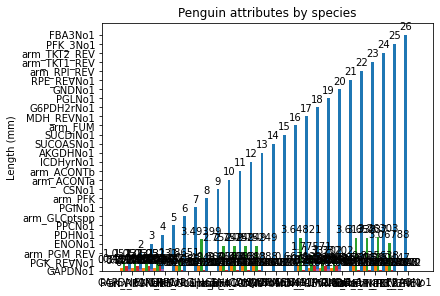

In [26]:
species = results2['Reaction']

x = np.arange(len(results2))
width = 0.25
multiplier = 0



fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in results2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=5)
ax.set_ylim(0, 4)

plt.show()

In [77]:
results2

,Reaction,BMDFSDR,MacroDFSDR,GAMDFSDR,NGAMDFSDR
0,GAPDNo1,0,0,0,0
1,PGK_REVNo1,0,0,0,0
2,arm_PGM_REV,0,0,0,0
3,ENONo1,0,0,0,0
4,PDHNo1,0,0,0,0
5,PPCNo1,0,0,0,0
6,arm_GLCptspp,0,0,0,0
7,PGINo1,0,0,0,0
8,arm_PFK,0,0,0,0
9,CSNo1,0,0,0,0


In [54]:
DictForCreatingGraph = {}
for count, x in enumerate(results2['Reaction']):
    if count == 4:
        break
    y = results2.iloc[count]
    reactname = y[0]
    DictForCreatingGraph[reactname] = (y[1], y[2], y[3], y[4])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

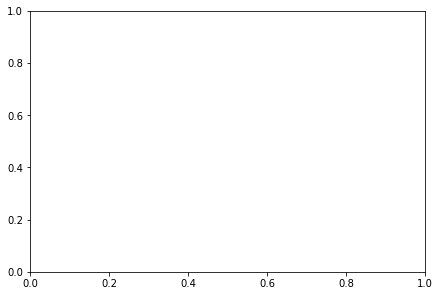

In [55]:
species = results2['Reaction']

x = np.arange(len(results2))
width = 0.25
multiplier = 0



fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in DictForCreatingGraph.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=5)
ax.set_ylim(0, 4)

plt.show()

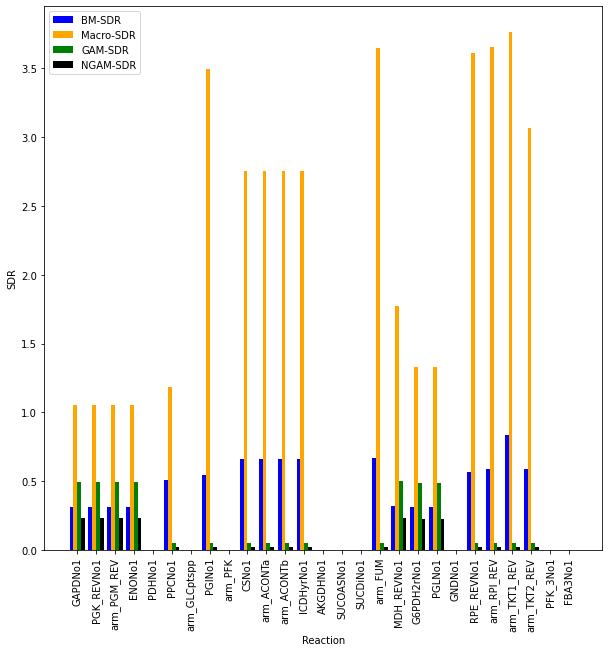

In [90]:
fig = plt.figure()
x = np.arange(len(results2))
width = 0.2

y1 = results2['BMDFSDR']
y2 = results2['MacroDFSDR']
y3 = results2['GAMDFSDR']
y4 = results2['NGAMDFSDR']

plt.bar(x-0.3, y1, width, color='blue')
plt.bar(x-0.1, y2, width, color='orange')
plt.bar(x+0.1, y3, width, color='green')
plt.bar(x+0.3, y4, width, color='black')

plt.xticks(x, results2['Reaction'], rotation = 'vertical')
plt.xlabel("Reaction")
plt.ylabel("SDR")
plt.legend(["BM-SDR", "Macro-SDR", "GAM-SDR", 'NGAM-SDR'])

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = False

plt.show()
fig.savefig('IndividualFluxes.pdf')

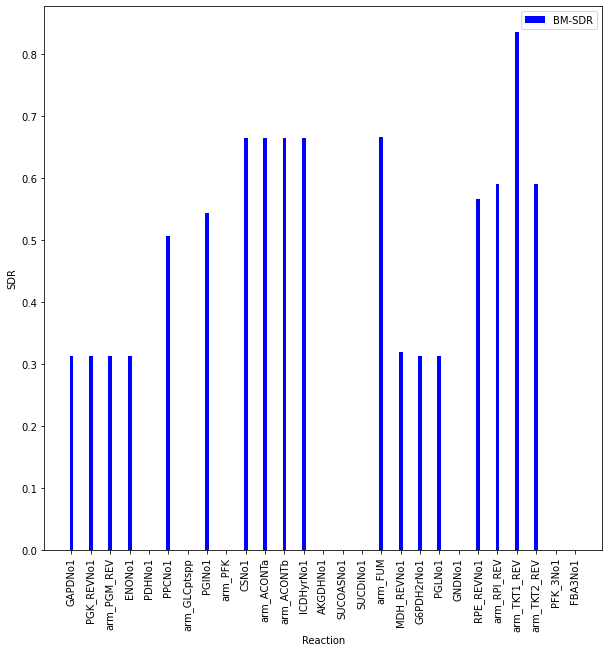

In [91]:
fig = plt.figure()
x = np.arange(len(results2))
width = 0.2

y1 = results2['BMDFSDR']

plt.bar(x, y1, width, color='blue')

plt.xticks(x, results2['Reaction'], rotation = 'vertical')
plt.xlabel("Reaction")
plt.ylabel("SDR")
plt.legend(["BM-SDR"])

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = False

plt.show()
fig.savefig('IndividualFluxesOnlyBM.pdf')

In [59]:
results2['BMDFSDR']

0     0.313008
1     0.313008
2     0.313008
3     0.313008
4     0.000000
5     0.507085
6     0.000000
7     0.543487
8     0.000000
9     0.664088
10    0.664088
11    0.664088
12    0.664088
13    0.000000
14    0.000000
15    0.000000
16    0.667122
17    0.320241
18    0.313225
19    0.313225
20    0.000000
21    0.567095
22    0.590605
23    0.835638
24    0.590447
25    0.000000
26    0.000000
Name: BMDFSDR, dtype: float64

In [3]:
#Step 1: Load up the results of the uncertainty injection on all biomass constitutions simultaneously.
#The interesting/important part of this data is the effects on the biomass pseudoreaction
#Might also be worth noting the relative difference between the effects of uncertainity on the individual reactions compared to the biomass reactions.
#The expected result is that the biomass pseudoreaction will have a massively dampening effect compared to the individual reactions


cidf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\dfFluxStat-BiomassComp.csv', sep = '\t')
Macrodf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\MacroVary\dfFluxStat.csv', sep = '\t')
GAMdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\GAMVary\dfFluxStat.csv', sep = '\t')
NGAMdf = pd.read_csv(r'C:\Users\Helge\MasterProject\AllCoEffResults\NGAMVary\dfFluxStat.csv', sep = '\t')
df1 = pd.read_csv('dfFluxStatExample.csv', sep = '\t')

In [6]:
print('All Coefficients')
print(LookUpValue(cidf))
print('Macromolecular Variation')
print(LookUpValue(Macrodf))
print('GAM Vary')
print(LookUpValue(GAMdf))
print('NGAM Vary')
print(LookUpValue(NGAMdf))

All Coefficients
83    0.429558
Name: Stdev_slope, dtype: float64
Macromolecular Variation
102    2.51756
Name: Stdev_slope, dtype: float64
GAM Vary
82    0.046905
Name: Stdev_slope, dtype: float64
NGAM Vary
82    0.021867
Name: Stdev_slope, dtype: float64


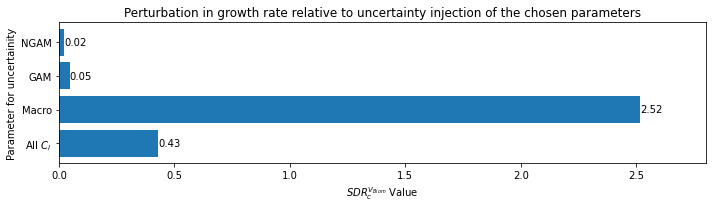

In [32]:
#Biomass Objective Function comparison:
BiomassUncertainGM = LookUpValue(cidf)
BiomassUncertainMacro = LookUpValue(Macrodf)
BiomassUncertainGAM = LookUpValue(GAMdf)
BiomassUncertainNGAM = LookUpValue(NGAMdf)


plotlist = []
plotlist.append(float(BiomassUncertainGM))
plotlist.append(float(BiomassUncertainMacro))
plotlist.append(float(BiomassUncertainGAM))
plotlist.append(float(BiomassUncertainNGAM))
namelist = []
namelist.append('All $C_{i}$')
namelist.append('Macro')
namelist.append('GAM')
namelist.append('NGAM')

fig, ax = plt.subplots()
hbars = ax.barh(namelist, plotlist)
ax.bar_label(hbars, fmt='%.2f')
plt.xlim(0, 2.8)
plt.xlabel('$SDR^{V_{Biom}}_c$ Value')
plt.ylabel('Parameter for uncertainity')

plt.title('Perturbation in growth rate relative to uncertainty injection of the chosen parameters')

plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True
plt.savefig('GRPert.pdf')

In [30]:
import os
os.getcwd()

'C:\\Users\\Helge\\MasterProject'

In [39]:
MacroDFOld = pd.read_csv(r'C:\Users\Helge\MasterProject\dfFluxStat.csv', sep = '\t')

In [40]:
print(LookUpValue(MacroDFOld))

102    2.51756
Name: Stdev_slope, dtype: float64


In [25]:
#Step 3: Noise in enzymatic "sizes" from noise in metabolic data

In [ ]:
#Step 3: Figure out how to inject similar noise into the kinetic proteins in the GECKO model (hard)